In [1]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set_palette('Set2')
#sns.set(style='whitegrid')

# Initial EDA

In [3]:
# Read in dataset

df = pd.read_csv('Data/Animal_Care_Pawstats.csv')
raw_df = df.copy()
df.head()

,Facility,Animal ID,Animal Type,Animal Breed,Impound No,Admission FY,Intake Type,Intake Group,Outcome FY,Outcome Type,Outcome Group,Intake Date,Outcome Date,ObjectId
0,Agoura,A0402346,CATS,AMER SH,K21-472202,2021-2022,STRAY,STRAY,2021-2022,FOSTER,NaN,9/14/2021 7:00:00 AM,9/14/2021 7:00:00 AM,1
1,Agoura,A0402346,CATS,AMER SH,K22-484670,2021-2022,FOSTER,DECEASED,2021-2022,DISPOSAL,NaN,1/20/2022 8:00:00 AM,1/20/2022 8:00:00 AM,2
2,Agoura,A1069240,CATS,DOMESTIC LH,K20-424964,2019-2020,STRAY,STRAY,2020-2021,ADOPTION,ADOPTION,6/29/2020 7:00:00 AM,7/11/2020 7:00:00 AM,3
3,Agoura,A1414740,DOGS,CHIHUAHUA SH,K20-421497,2019-2020,STRAY,STRAY,2019-2020,RTO,RTO,6/1/2020 7:00:00 AM,6/1/2020 7:00:00 AM,4
4,Agoura,A2322862,DOGS,ROTTWEILER,K23-569294,2023-2024,STRAY,DECEASED,2023-2024,DEAD,NaN,12/14/2023 8:00:00 AM,12/14/2023 8:00:00 AM,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262777 entries, 0 to 262776
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Facility       262777 non-null  object
 1   Animal ID      262777 non-null  object
 2   Animal Type    262777 non-null  object
 3   Animal Breed   262776 non-null  object
 4   Impound No     262777 non-null  object
 5   Admission FY   262777 non-null  object
 6   Intake Type    262777 non-null  object
 7   Intake Group   252583 non-null  object
 8   Outcome FY     261460 non-null  object
 9   Outcome Type   262777 non-null  object
 10  Outcome Group  188028 non-null  object
 11  Intake Date    262777 non-null  object
 12  Outcome Date   261460 non-null  object
 13  ObjectId       262777 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 28.1+ MB


In [5]:
df.isna().sum()

Facility             0
Animal ID            0
Animal Type          0
Animal Breed         1
Impound No           0
Admission FY         0
Intake Type          0
Intake Group     10194
Outcome FY        1317
Outcome Type         0
Outcome Group    74749
Intake Date          0
Outcome Date      1317
ObjectId             0
dtype: int64

## Address missing values in Intake Group

In [6]:
df['Intake Group'].value_counts(dropna=False)

STRAY        137317
DECEASED      61318
OWNER SUR     40622
OTHER         13326
NaN           10194
Name: Intake Group, dtype: int64

In [7]:
df['Intake Type'].unique()

array(['STRAY', 'FOSTER', 'OWNER SUR', 'DISPO REQ', 'EMER EVAC',
       'TRANSFER', 'RETURN', 'OWNER DIED', 'PD REQUEST', 'TRANS_INT',
       'ARRESTED', 'HOSPITALIZ', 'ABANDONED', 'CONFISCATE', 'COLA HI',
       'SN BOARD', 'ASPCAPW', 'BORNINCARE', 'FINDER', 'TRANS_EXT',
       'COURT CASE', 'ANI-SAFE', 'DANGER DOG'], dtype=object)

In [8]:
# Identify which Intake TYPES contain missing Intake GROUP value
missing_intake = df[df['Intake Group'].isna()]
missing_intake['Intake Type'].value_counts()


FOSTER       4350
TRANSFER     3603
TRANS_INT    2091
FINDER        101
DISPO REQ      25
TRANS_EXT      24
Name: Intake Type, dtype: int64

In [9]:
# Fill intake group NaN's according to existing category, if exists; 'OTHER' if not existing category
# Create new intake group 'IN SYSTEM' for animals that are already in the system but are being shuffled around

intake_mappings = {'FOSTER': 'IN SYSTEM',
                   'FINDER': 'STRAY',
                   'TRANSFER': 'IN SYSTEM',
                  'TRANS_INT': 'IN SYSTEM',
                  'TRANS_EXT': 'IN SYSTEM',
                  'DISPO REQ': 'OTHER'}

df['Intake Group'] = df['Intake Group'].fillna(df['Intake Type'].map(intake_mappings))

## Address missing values in Outcome Group

In [10]:
df['Outcome Group'].value_counts(dropna=False)

NaN           74749
ADOPTION      69148
EUTHANASIA    55017
RESCUE        36827
RTO           21443
OTHER LIVE     3008
DIED           2126
ESCAPED         278
MISSING         181
Name: Outcome Group, dtype: int64

In [11]:
df['Outcome Type'].unique()

array(['FOSTER', 'DISPOSAL', 'ADOPTION', 'RTO', 'DEAD', 'RTO MICRO',
       'EUTH', 'RESCUE', 'RTO FLDMIC', 'DIED', 'RTO FLD ID', 'ASPCAPW',
       'TRANS_EXT', 'TRANSFER', 'RTN', 'WILD RESCUE', 'MISSING',
       'ESCAPED', 'UNK9999999', 'TRANS_INT', 'RTC', 'CLOSE2HOME',
       'ASPCATRANS', 'COOL CEN'], dtype=object)

In [12]:
# Identify which Outcome TYPES contain missing Outcome GROUP value
missing_outcome = df[df['Outcome Group'].isna()]
missing_outcome['Outcome Type'].value_counts()


DEAD          58204
FOSTER         5034
TRANSFER       4958
DISPOSAL       3114
TRANS_INT      2120
UNK9999999     1318
COOL CEN          1
Name: Outcome Type, dtype: int64

In [13]:
# See if manually looking at the data will yield any more info about outome 'UNK9999999'
df[df['Outcome Type']=='UNK9999999'].sample(5)

,Facility,Animal ID,Animal Type,Animal Breed,Impound No,Admission FY,Intake Type,Intake Group,Outcome FY,Outcome Type,Outcome Group,Intake Date,Outcome Date,ObjectId
222454,Lancaster,A5685872,DOGS,PIT BULL,K25-627676,2024-2025,STRAY,STRAY,NaN,UNK9999999,NaN,3/16/2025 7:00:00 AM,NaN,222455
262728,Palmdale,A5688548,DOGS,PIT BULL,K25-629139,2024-2025,OWNER SUR,OWNER SUR,NaN,UNK9999999,NaN,3/27/2025 7:00:00 AM,NaN,262729
222677,Lancaster,A5688517,DOGS,AUST CATTLE DOG,K25-629108,2024-2025,STRAY,STRAY,NaN,UNK9999999,NaN,3/27/2025 7:00:00 AM,NaN,222678
61407,Baldwin Park,A5686191,DOGS,SIBERIAN HUSKY,K25-629250,2024-2025,OWNER SUR,OWNER SUR,NaN,UNK9999999,NaN,3/29/2025 7:00:00 AM,NaN,61408
222488,Lancaster,A5686119,DOGS,GERM SHEPHERD,K25-627847,2024-2025,OWNER SUR,OWNER SUR,NaN,UNK9999999,NaN,3/17/2025 7:00:00 AM,NaN,222489


Manual check of the data showed that 'UNK9999999' are also missing outcome date and outcome year. These rows have too much missing to be informational. We could impute the values, but given the extent of missing variables and their correlations I would doubt it's reliability. Let's check if it's a small enough percentage of the data that it could be dropped without affected the overall data much.

In [14]:
# Proportion of data that contains 'UNK9999999' as Outcome Group
len(df[df['Outcome Type']=='UNK9999999']) / len(df)

0.005015659665800279

In [15]:
# Fill Outcome Group NaN's according to existing category, if exists; 'OTHER' if not
outcome_mappings = {'FOSTER': 'OTHER LIVE',
                   'DISPOSAL': 'DIED',
                   'DEAD': 'DIED',
                  'TRANSFER': 'OTHER LIVE',
                  'TRANS_INT': 'OTHER LIVE',
                  'COOL CEN': 'OTHER LIVE'}

# Drop rows with 'UNK9999999' as they sum to an insignificant amount of data (<1%)
df = df[~(df['Outcome Type']=='UNK9999999')].copy()

df['Outcome Group'] = df['Outcome Group'].fillna(df['Outcome Type'].map(outcome_mappings))

In [16]:
df.isna().sum()

Facility          0
Animal ID         0
Animal Type       0
Animal Breed      1
Impound No        0
Admission FY      0
Intake Type       0
Intake Group      0
Outcome FY       11
Outcome Type      0
Outcome Group     0
Intake Date       0
Outcome Date     11
ObjectId          0
dtype: int64

In [17]:
# Drop remaining NaN values as they are insignificant (<1%) and true values not able to be retrieved
df.dropna(inplace=True)

df.isna().sum()

Facility         0
Animal ID        0
Animal Type      0
Animal Breed     0
Impound No       0
Admission FY     0
Intake Type      0
Intake Group     0
Outcome FY       0
Outcome Type     0
Outcome Group    0
Intake Date      0
Outcome Date     0
ObjectId         0
dtype: int64

### Missing values are addressed, but there are still many Outcome Group columns. Because Outcome Type contains more specific outcomes, let's consolidate the Outcome Group column for easier interpretability.

In [18]:
df['Outcome Group'].value_counts()

ADOPTION      69144
DIED          63442
EUTHANASIA    55017
RESCUE        36826
RTO           21438
OTHER LIVE    15121
ESCAPED         278
MISSING         181
Name: Outcome Group, dtype: int64

 ESCAPED and MISSING do not contain many values, and can easily be grouped into the the OTHER LIVE category

In [19]:
# Consolidate Outcome Groups with mappings

outcome_live_mappings = {'ESCAPED': 'OTHER LIVE',
                   'MISSING': 'OTHER LIVE'}

df['Outcome Group'] = df['Outcome Group'].replace(outcome_live_mappings)

In [20]:
df['Outcome Group'].value_counts()

ADOPTION      69144
DIED          63442
EUTHANASIA    55017
RESCUE        36826
RTO           21438
OTHER LIVE    15580
Name: Outcome Group, dtype: int64

## Visualization EDA

In [21]:
def create_countplot(data=pd.DataFrame, column_name=str, title=None, ax=None, hue=None, rotation=0):
    '''Creates barplot with value counts on y-axis for a given dataframe and column name.'''
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    
    df = data
    order = df[column_name].value_counts().index
    
    ax = sns.countplot(data=df, y=column_name, hue=hue, ax=ax, order=order)
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.tick_params(axis='x', labelrotation=rotation)
    ax.set_ylabel(column_name)
    
    return ax
    


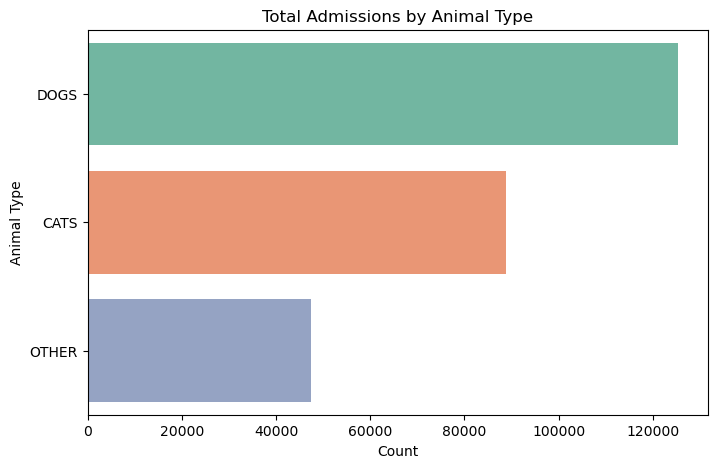

<Figure size 1000x500 with 0 Axes>

In [22]:
create_countplot(data=df, column_name='Animal Type', title='Total Admissions by Animal Type')
plt.figure(figsize=(10, 5))
plt.show()

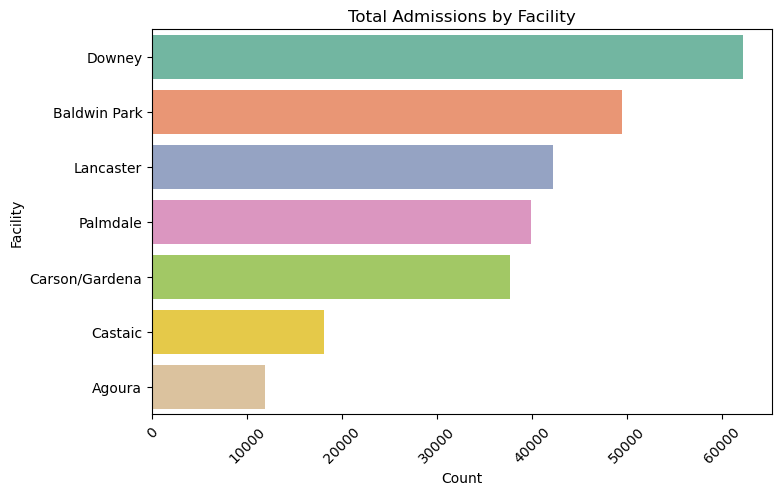

<Figure size 1000x500 with 0 Axes>

In [23]:
create_countplot(data=df, column_name='Facility', title='Total Admissions by Facility', rotation=45)
plt.figure(figsize=(10, 5))
plt.show()

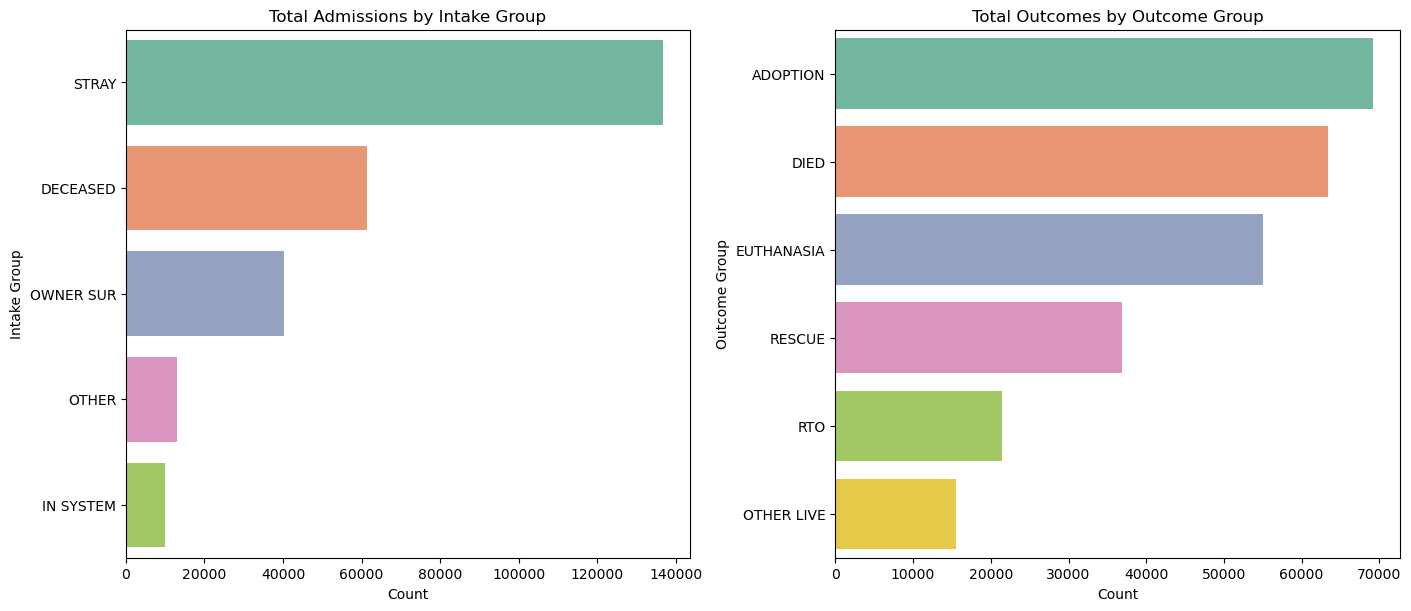

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6),  layout='constrained')

create_countplot(data=df, column_name='Intake Group', ax=axs[0], title='Total Admissions by Intake Group')
create_countplot(data=df, column_name='Outcome Group', ax=axs[1], title='Total Outcomes by Outcome Group')

plt.show()

## Intake and Oucomes by Animal Type

In [25]:
# Group data to visualize how Intake Group varies based on species
intake_group_df = df.groupby(['Animal Type', 'Intake Group']).size().unstack()
intake_group_df

Intake Group,DECEASED,IN SYSTEM,OTHER,OWNER SUR,STRAY
Animal Type,,,,,
CATS,21888,3687,2331,9072,51754
DOGS,19729,5738,7973,25547,66381
OTHER,19699,590,2730,5626,18702


In [26]:
# Group data to visualize how outcome Group varies based on species
outcome_group_df = df.groupby(['Animal Type', 'Outcome Group']).size().unstack()
outcome_group_df

Outcome Group,ADOPTION,DIED,EUTHANASIA,OTHER LIVE,RESCUE,RTO
Animal Type,,,,,,
CATS,19803,22820,23801,4510,16750,1048
DOGS,44921,20272,15916,7495,17730,19034
OTHER,4420,20350,15300,3575,2346,1356


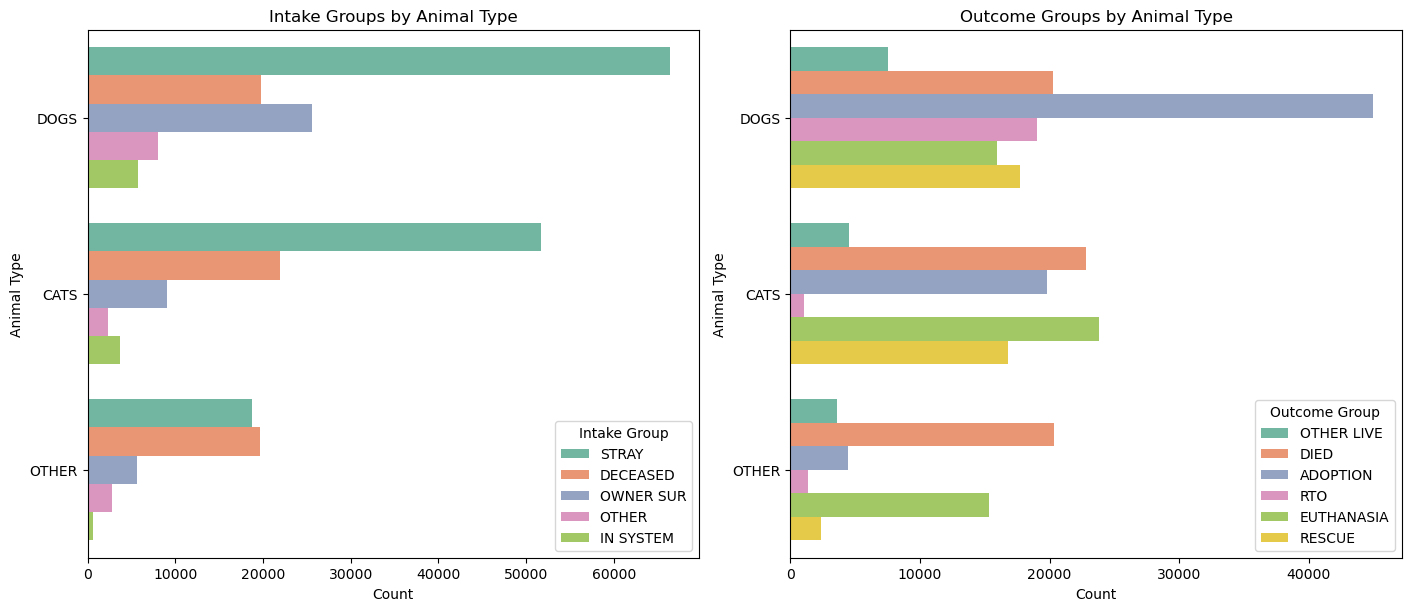

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), layout='constrained')

ax = create_countplot(data=df, column_name='Animal Type', hue='Intake Group', ax=axes[0], title='Intake Groups by Animal Type')
ax = create_countplot(data=df, column_name='Animal Type', hue='Outcome Group', ax=axes[1], title='Outcome Groups by Animal Type')



#### The different intake group proportions are generally similar between cats and dogs, with the exception of dogs being far more common to be surrendered by owner.
#### The outcome distributions show that dogs are adopted at a much higher rate than any other species. It also shows that cats are very rarely returned to owner, while not uncommon for dogs. 
#### The 'OTHER' species distribution does not follow the same general trends as cats and dogs, which makes sense as exotic species are rare to have as pets, and the category includes all wildlife as well. A high proportion of other come in as deceased, and very few are adopted out.

## Most common breeds

In [28]:
def create_breed_graph(data=pd.DataFrame, animal=str, outcome=None, ax=None, title=None):
    if outcome:
        df = data.loc[(data['Animal Type']==animal) & (data['Outcome Group']==outcome)]
    else:
        df = data.loc[data['Animal Type']==animal]

    
    breed_counts = df['Animal Breed'].value_counts().reset_index()
    breed_counts.columns = ['Animal Breed', 'Count']

    ax = sns.barplot(x='Animal Breed', y='Count', data=breed_counts[:5], ax=ax)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)


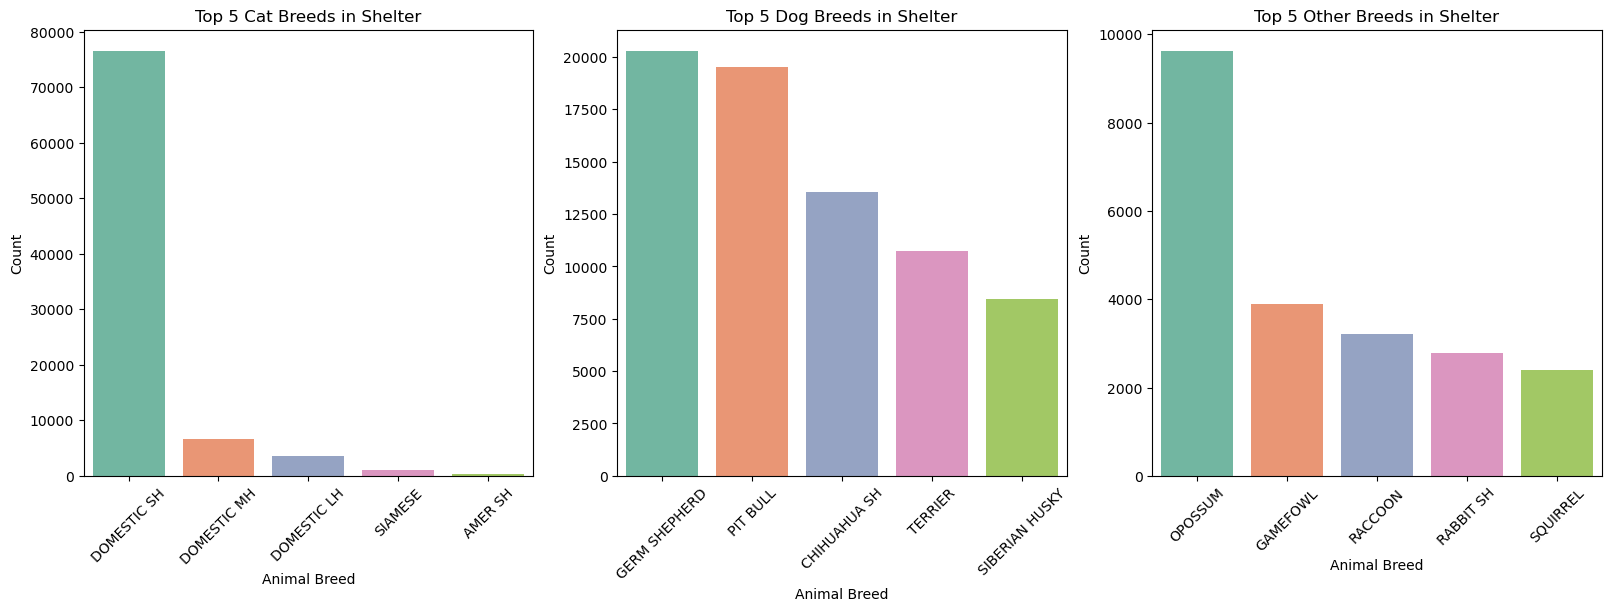

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), layout='constrained')

ax = create_breed_graph(data=df, animal='CATS', ax=axs[0], title='Top 5 Cat Breeds in Shelter')
ax = create_breed_graph(data=df, animal='DOGS', ax=axs[1], title='Top 5 Dog Breeds in Shelter')
ax = create_breed_graph(data=df, animal='OTHER', ax=axs[2], title='Top 5 Other Breeds in Shelter')

plt.show()

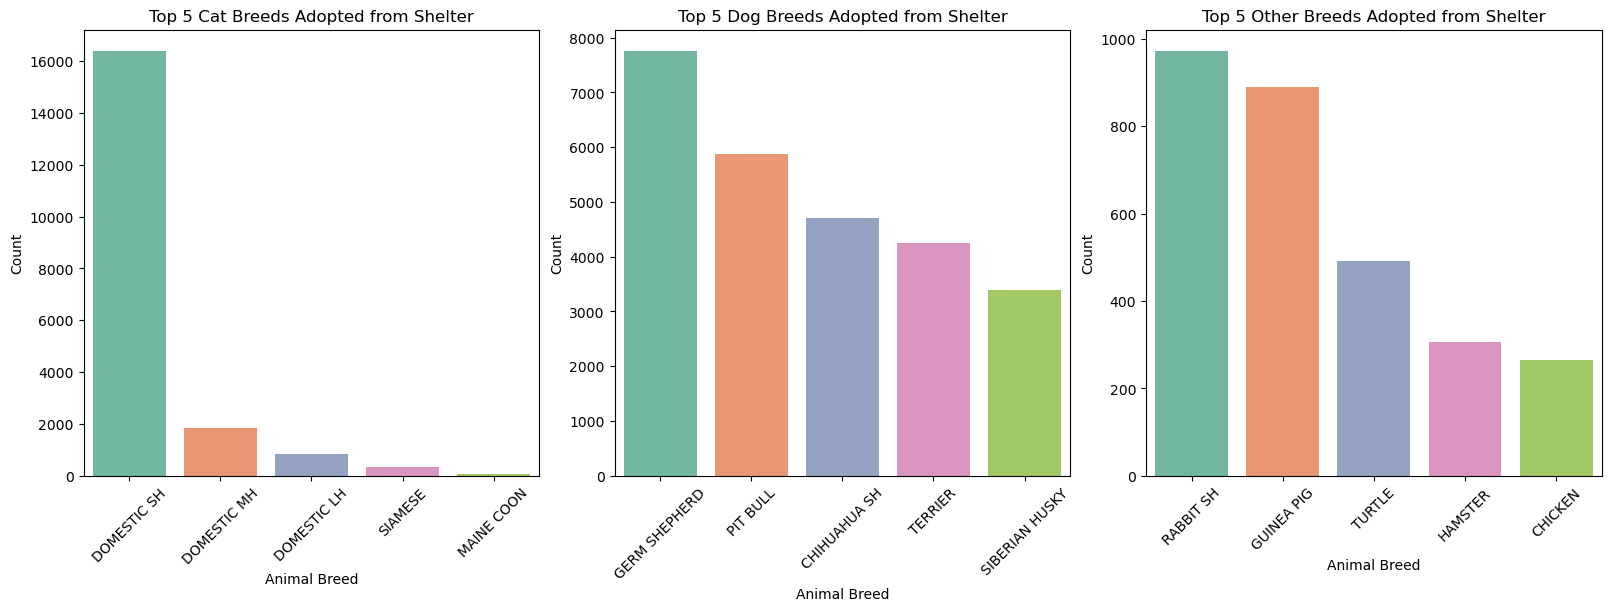

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), layout='constrained')

ax = create_breed_graph(data=df, animal='CATS', outcome='ADOPTION', ax=axs[0], title='Top 5 Cat Breeds Adopted from Shelter')
ax = create_breed_graph(data=df, animal='DOGS', outcome='ADOPTION', ax=axs[1], title='Top 5 Dog Breeds Adopted from Shelter')
ax = create_breed_graph(data=df, animal='OTHER', outcome='ADOPTION', ax=axs[2], title='Top 5 Other Breeds Adopted from Shelter')

plt.show()

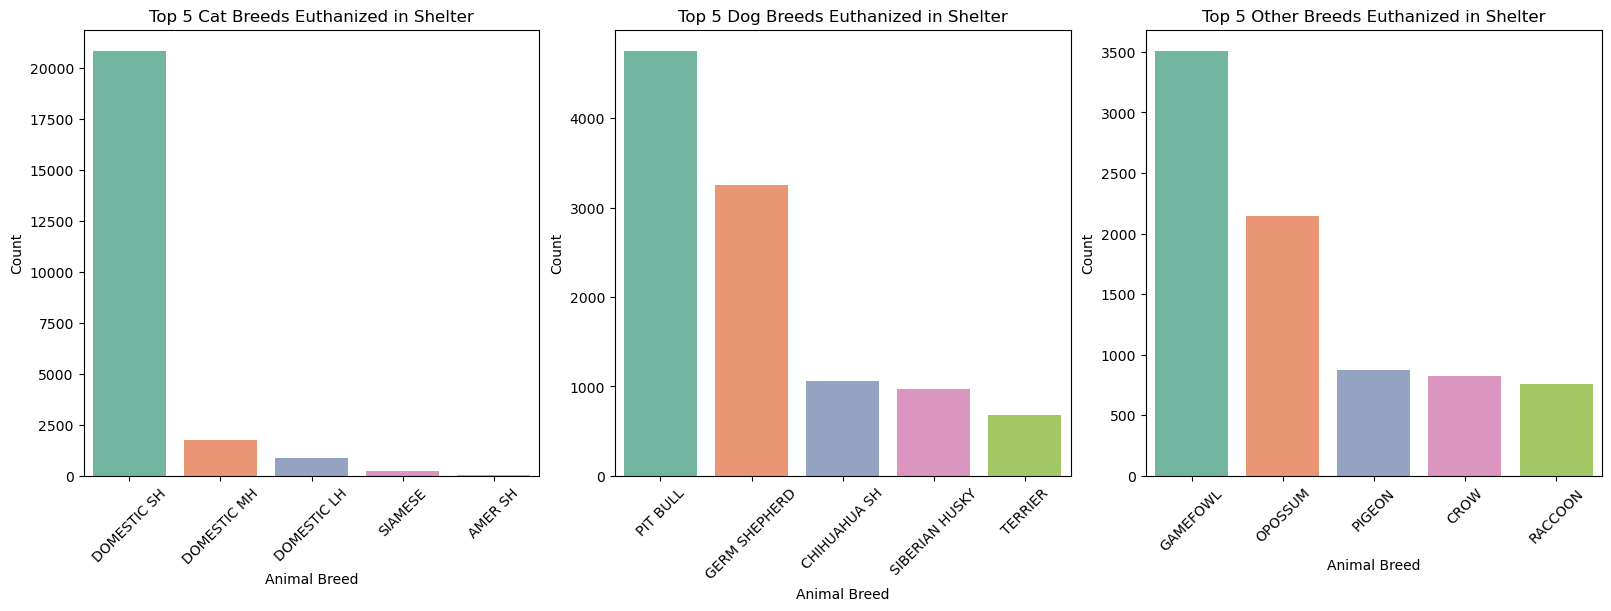

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), layout='constrained')

ax = create_breed_graph(data=df, animal='CATS', outcome='EUTHANASIA', ax=axs[0], title='Top 5 Cat Breeds Euthanized in Shelter')
ax = create_breed_graph(data=df, animal='DOGS', outcome='EUTHANASIA', ax=axs[1], title='Top 5 Dog Breeds Euthanized in Shelter')
ax = create_breed_graph(data=df, animal='OTHER', outcome='EUTHANASIA', ax=axs[2], title='Top 5 Other Breeds Euthanized in Shelter')

plt.show()

## Examing adoption 
In order to effectively examine adoption rates, we will only include animals who arrived to the shelter alive. We will also not include the 'OTHER' category as it is largely made up of wildlife animals which cannot be adopted.

#### Feature engineer binary 'Adopted' column

In [32]:
# Feature engineer 'Adopted' column
df['Adopted'] = np.where(df['Outcome Group']=='ADOPTION', 'Adopted', 'Not Adopted')

In [33]:
# Create filtered df with live cats and dogs
live_df = df.loc[(df['Intake Group']!='DECEASED')]# & (df['Animal Type']!='OTHER')].copy()

In [34]:
intake_animal_counts = live_df.groupby('Intake Group').size()
intake_adopt_counts = live_df[live_df['Outcome Group']=='ADOPTION'].groupby('Intake Group').size()

intake_adopt_rates = (intake_adopt_counts / intake_animal_counts).fillna(0).reset_index(name='Proportion Adopted')
intake_adopt_rates


,Intake Group,Proportion Adopted
0,IN SYSTEM,0.656216
1,OTHER,0.362974
2,OWNER SUR,0.440378
3,STRAY,0.293181


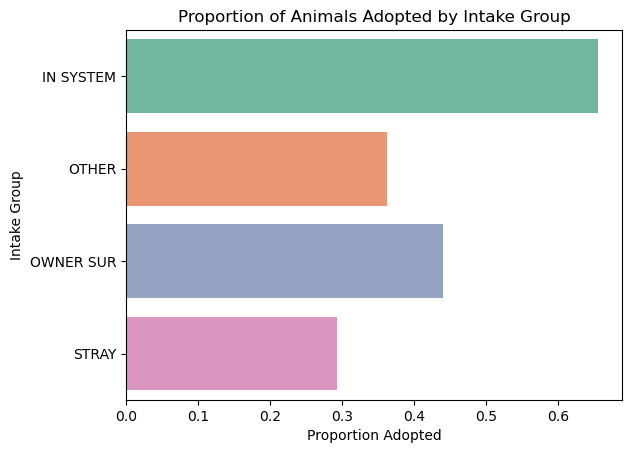

In [35]:
sns.barplot(x='Proportion Adopted', y='Intake Group', data=intake_adopt_rates)
plt.title('Proportion of Animals Adopted by Intake Group')
plt.show()

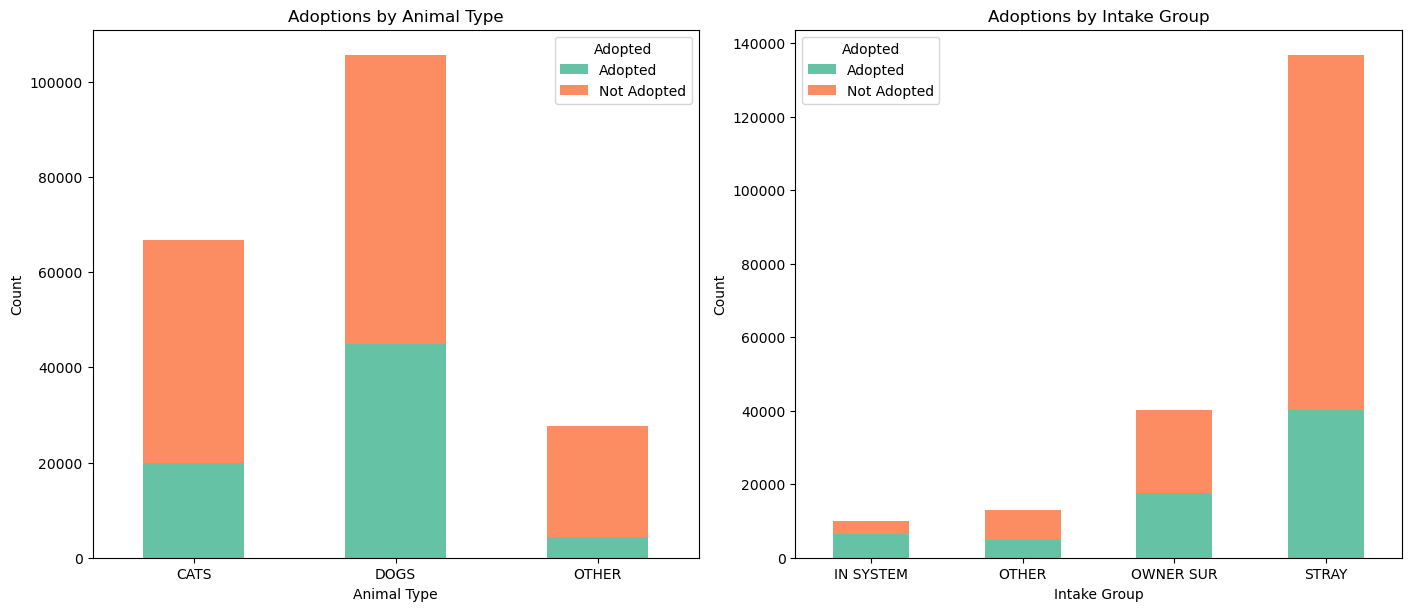

In [36]:
# Adoptions by animal type and intake group

adopt_animals = live_df.groupby(['Animal Type', 'Adopted']).size().unstack()
adopt_intakes = live_df.groupby(['Intake Group', 'Adopted']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 6), layout=('constrained'))

ax = adopt_animals.plot(kind='bar', stacked=True, ax=axes[0], title='Adoptions by Animal Type')
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('Count')

ax = adopt_intakes.plot(kind='bar', stacked=True, ax=axes[1], title='Adoptions by Intake Group')
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('Count')

plt.show()

In [37]:
live_intake_counts = live_df.groupby(['Intake Group', 'Animal Type']).size()

animal_adopt_counts = live_df[live_df['Outcome Group']=='ADOPTION'].groupby(['Intake Group', 'Animal Type']).size()

animal_adopt_rates = (animal_adopt_counts / live_intake_counts).fillna(0).reset_index(name='Adoption Rate')

pivot_df = animal_adopt_rates.pivot(index='Intake Group', columns='Animal Type', values='Adoption Rate').fillna(0)
pivot_df

Animal Type,CATS,DOGS,OTHER
Intake Group,,,
IN SYSTEM,0.685381,0.625654,0.771186
OTHER,0.501502,0.398344,0.141392
OWNER SUR,0.568122,0.427761,0.291681
STRAY,0.211636,0.410163,0.103625


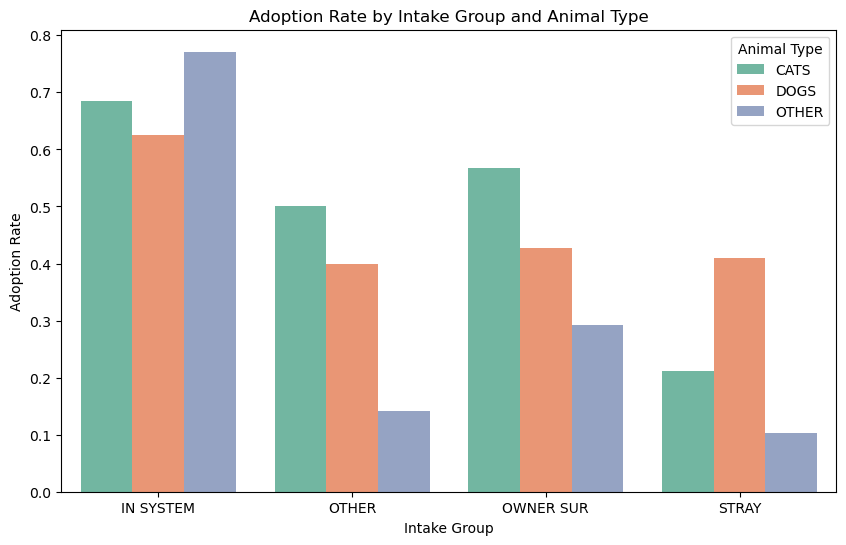

In [38]:
melted_df = pivot_df.reset_index().melt(id_vars='Intake Group', var_name='Animal Type', value_name='Adoption Rate')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Intake Group', y='Adoption Rate', hue='Animal Type')
plt.title('Adoption Rate by Intake Group and Animal Type')
plt.ylabel('Adoption Rate')
plt.show()

### Animals already in the shelter system have the highest adoption rates, this may be because a large number of the 'in system' animals are in foster care, and maybe foster animals have a greater chance of being adopted.
### Much more (~100%) stray dogs adopted than stray cats. One possible reason for this could be that more stray cats are feral than stray dogs, and therefore not very adoptable. If additional data were collected to differentiate 'feral' from 'stray' we could gather more evidence for this theory.

## Euthanasia Rates

In [39]:
intake_animal_counts = live_df.groupby('Intake Group').size()
intake_euth_counts = live_df[live_df['Outcome Group']=='EUTHANASIA'].groupby('Intake Group').size()

intake_euth_rates = (intake_euth_counts / intake_animal_counts).fillna(0).reset_index(name='Euthanasia Rate')
intake_euth_rates = intake_euth_rates.loc[intake_euth_rates['Intake Group'] != 'DECEASED']
intake_euth_rates


,Intake Group,Euthanasia Rate
0,IN SYSTEM,0.046231
1,OTHER,0.134341
2,OWNER SUR,0.281650
3,STRAY,0.303047


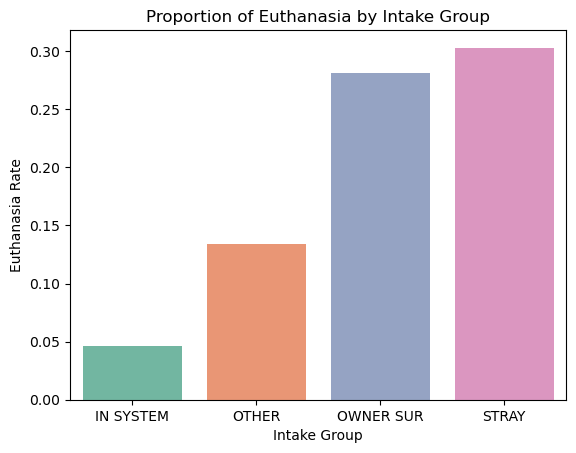

In [40]:
sns.barplot(x='Intake Group', y='Euthanasia Rate', data=intake_euth_rates)
plt.title("Proportion of Euthanasia by Intake Group")
plt.show()

In [41]:
intake_animal_counts = df.groupby(['Intake Group', 'Animal Type']).size()
animal_euth_counts = df[df['Outcome Group']=='EUTHANASIA'].groupby(['Intake Group', 'Animal Type']).size()

animal_euth_rates = (animal_euth_counts / intake_animal_counts).fillna(0).reset_index(name='Euthanasia Rate')
animal_euth_rates = animal_euth_rates.loc[animal_euth_rates['Intake Group'] != 'DECEASED']

pivot_df = animal_euth_rates.pivot(index='Intake Group', columns='Animal Type', values='Euthanasia Rate').fillna(0)
pivot_df

Animal Type,CATS,DOGS,OTHER
Intake Group,,,
IN SYSTEM,0.050719,0.043743,0.042373
OTHER,0.100386,0.083532,0.311722
OWNER SUR,0.160825,0.256938,0.588695
STRAY,0.423561,0.127069,0.594161


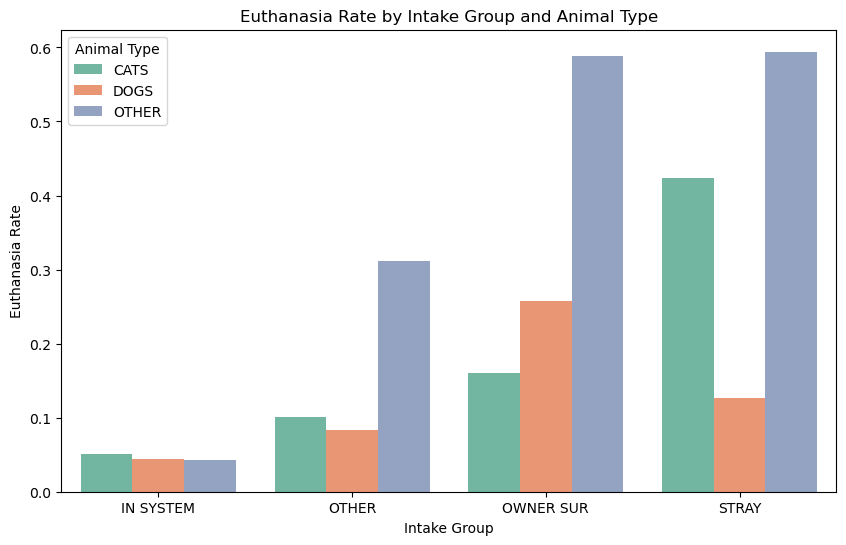

In [42]:
melted_df = pivot_df.reset_index().melt(id_vars='Intake Group', var_name='Animal Type', value_name='Euthanasia Rate')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='Intake Group', y='Euthanasia Rate', hue='Animal Type')
plt.title('Euthanasia Rate by Intake Group and Animal Type')
plt.ylabel('Euthanasia Rate')
plt.show()

### The highest proportion of euthanized dogs are surrenedered by owner, this might indicate something about the temperament of these dogs. Maybe more dogs are surrenedered for behaviorial issues than other animals? Gathering additional data on the reason for surrender would be useful here.
### By far the highest proportion of euthanized cats come in as strays. This is in line with the earlier insight that stray cats are not very adoptable.
### The highest proportion of euthanized 'other' animals are either owner surrendered or stray. A high proportion of strays does make sense considered that a large proportion of the category is wildlife. However, it is not as obvious why a high proportion of owner surrendered 'other' animals are euthanized. Perhaps they are exotic pets that are difficult to take care of, and therefore surrendered at a higher rate and not likely to be adopted due to the level of care needed.


## Intakes and Outcomes by month and year

In [43]:
df['Intake Date'] = pd.to_datetime(df['Intake Date'], errors='coerce')
df['Outcome Date'] = pd.to_datetime(df['Outcome Date'], errors='coerce')

### Feature engineer month, year, and duration columns

In [44]:
df['Duration (Days)'] = (df['Outcome Date'] - df['Intake Date']).dt.days
df['Intake Month'] = df['Intake Date'].dt.month_name()
df['Outcome Month'] = df['Outcome Date'].dt.month_name()
df['Intake Year'] = df['Intake Date'].dt.year
df['Outcome Year'] = df['Outcome Date'].dt.year

In [45]:
# Order months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['Intake Month'] = pd.Categorical(df['Intake Month'], categories=month_order, ordered=True)
df['Outcome Month'] = pd.Categorical(df['Outcome Month'], categories=month_order, ordered=True)



In [46]:
# Check value counts in each year
print(df.groupby('Intake Year').size().reset_index(name='Count'))
print(df.groupby('Outcome Year').size().reset_index(name='Count'))


    Intake Year  Count
0          2010      1
1          2016      3
2          2017     11
3          2018     52
4          2019  39256
5          2020  40359
6          2021  37893
7          2022  42377
8          2023  44556
9          2024  47661
10         2025   9278
    Outcome Year  Count
0           2002      1
1           2007      1
2           2016      1
3           2017      2
4           2019  37979
5           2020  41060
6           2021  37587
7           2022  42084
8           2023  44557
9           2024  47784
10          2025  10391


In [47]:
# Drop years with total count less than 30,000 (not enough data)
years_to_keep = [2019, 2020, 2021, 2022, 2023, 2024]
df = df[(df['Intake Year'].isin(years_to_keep)) & (df['Outcome Year'].isin(years_to_keep))].copy()


In [48]:
# Create adoption only dataframe
adopt_df = df[df['Outcome Group']=='ADOPTION'].copy()

In [49]:
df1 = adopt_df.groupby(['Outcome Year', 'Outcome Month']).size().reset_index(name='Count')

In [50]:
df2 = adopt_df.groupby(['Outcome Year', 'Outcome Month'])['Outcome Type'].value_counts().reset_index(name='Count')


In [51]:
df.groupby(['Intake Month']).size().div(12).astype(int).reset_index(name='Number Intakes')

,Intake Month,Number Intakes
0,January,1315
1,February,1206
2,March,1411
3,April,1521
4,May,1733
5,June,1931
6,July,2340
7,August,2252
8,September,2010
9,October,2056


In [52]:
#Calculate monthly intakes averaged per year
monthly_intakes = df.groupby(['Intake Year', 'Intake Month']).size().div(12).astype(int).reset_index(name='Number Intakes')

# Calculate monthly adoptions averaged per year
adopt_df = df[df['Outcome Group']=='ADOPTION'].copy()
monthly_adoptions = adopt_df.groupby(['Outcome Year', 'Outcome Month']).size().div(12).astype(int).reset_index(name='Number Adoptions')

# Calculate monthly euthanasias averaged per year
euth_df = df[df['Outcome Group']=='EUTHANASIA'].copy()
monthly_euths = euth_df.groupby(['Outcome Year', 'Outcome Month']).size().div(12).astype(int).reset_index(name='Number Euthanasias')

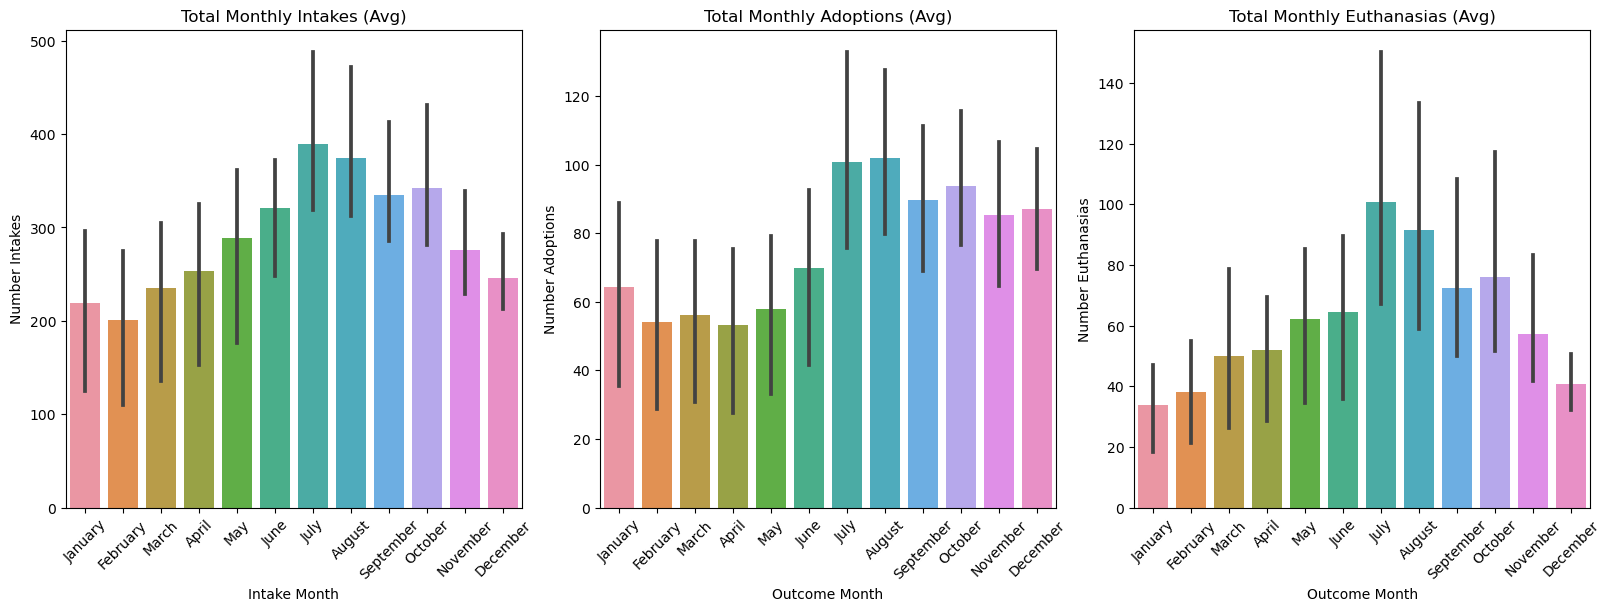

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(16, 6), layout='constrained')

ax = sns.barplot(data=monthly_intakes, x='Intake Month', y='Number Intakes', ax=axs[0])
ax.set_title('Total Monthly Intakes (Avg)')
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(data=monthly_adoptions, x='Outcome Month', y='Number Adoptions', ax=axs[1])
ax.set_title('Total Monthly Adoptions (Avg)')
ax.tick_params(axis='x', rotation=45)

ax = sns.barplot(data=monthly_euths, x='Outcome Month', y='Number Euthanasias', ax=axs[2])
ax.set_title('Total Monthly Euthanasias (Avg)')
ax.tick_params(axis='x', rotation=45)

plt.show()

### The monthly number of intakes and euthanasias follow roughly the same trend (both higher in the summer months), but the adoption numbers vary more from month to month without having any obvious trends.

(35000.0, 50000.0)

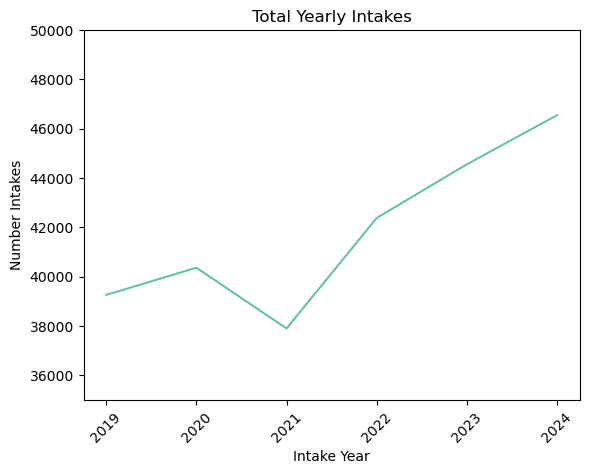

In [54]:
yearly_intake = df.groupby(['Intake Year']).size().reset_index(name='Number Intakes')

ax = sns.lineplot(data=yearly_intake, x='Intake Year', y='Number Intakes')
ax.set_title('Total Yearly Intakes')
ax.tick_params(axis='x', rotation=45)
ax.set_ylim(35000, 50000)



### Total amount of intakes appears to be linearly increasing by year, with the exception of a large drop in 2021. One possible explanation for this may be that fewer people will bringing in their animals during covid. 

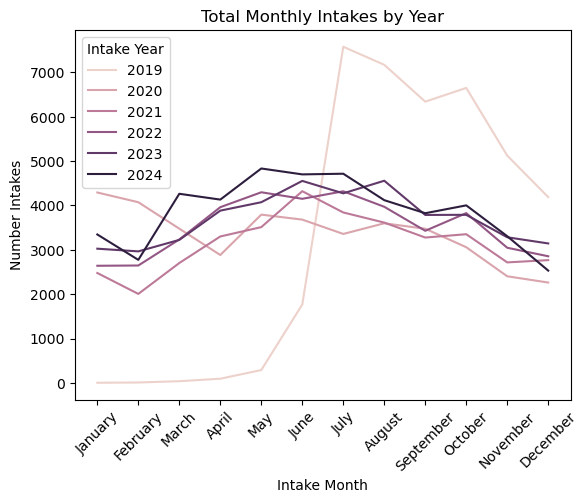

In [55]:
monthly_intake = df.groupby(['Intake Year', 'Intake Month']).size().reset_index(name='Number Intakes')

ax = sns.lineplot(data=monthly_intake, x='Intake Month', y='Number Intakes', hue='Intake Year')
ax.set_title('Total Monthly Intakes by Year')
ax.tick_params(axis='x', rotation=45)
plt.show()

###  The monthly intakes appear to follow roughly the same trend each year, generally highest in the summer months and lowest in the winter months.
### One outlier is 2019, which has almost no intakes prior to June, but then has by far the highest number of intakes for every month following. This may indicate a possible error in the data.

In [56]:
df_2019 = df[df['Intake Year']==2019]
df_2019['Intake Month'].value_counts()


July         7576
August       7169
October      6648
September    6339
November     5123
December     4188
June         1768
May           291
April          96
March          40
February       11
January         5
Name: Intake Month, dtype: int64

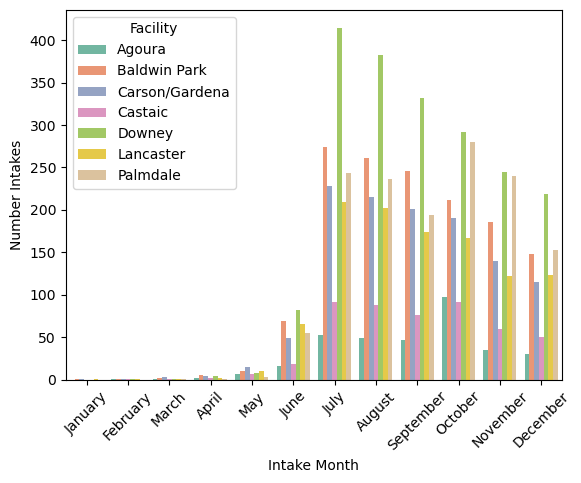

In [57]:
grouped_df = df_2019.groupby(['Intake Month', 'Intake Group', 'Facility']).size().reset_index(name='Number Intakes')
sns.barplot(data=grouped_df, x='Intake Month', y='Number Intakes', hue='Facility', errorbar=None)
plt.xticks(rotation=45)
plt.show()

### It is not clear why the data is so extreme for 2019, but seems like it did not start being collected consistently for any facility until around June or July of 2019 so we can drop 2019 as well before examining monthly totals.

In [58]:
df = df[(df['Intake Year']!=2019) & (df['Outcome Year']!=2019)]


## Shelter Duration

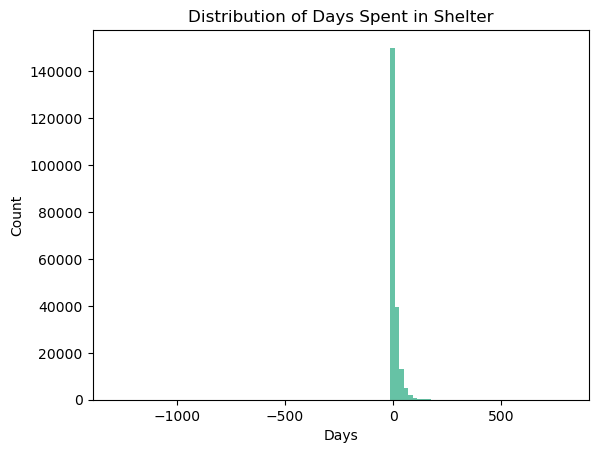

In [59]:
# Plot histogram of duration to examine spread
plt.hist(df['Duration (Days)'], bins=100)
plt.title('Distribution of Days Spent in Shelter')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### There should not be any negative values for duration (it is not possible to have a negative duration of time. Let's examine the duration column to find the issue

In [60]:
df[df['Duration (Days)']<0].sample(5)

,Facility,Animal ID,Animal Type,Animal Breed,Impound No,Admission FY,Intake Type,Intake Group,Outcome FY,Outcome Type,Outcome Group,Intake Date,Outcome Date,ObjectId,Adopted,Duration (Days),Intake Month,Outcome Month,Intake Year,Outcome Year
59199,Baldwin Park,A5664563,CATS,SIAMESE,K24-614218,2024-2025,DISPO REQ,DECEASED,2024-2025,DEAD,DIED,2024-11-19 08:00:00,2024-07-10 07:00:00,59200,Not Adopted,-133,November,July,2024,2024
169591,Downey,A5613145,OTHER,GAMEFOWL,K24-578826,2023-2024,OWNER SUR,OWNER SUR,2023-2024,EUTH,EUTHANASIA,2024-03-14 07:00:00,2024-03-13 07:00:00,169592,Not Adopted,-1,March,March,2024,2024
169711,Downey,A5613266,OTHER,GAMEFOWL,K24-578946,2023-2024,OWNER SUR,OWNER SUR,2023-2024,EUTH,EUTHANASIA,2024-03-14 07:00:00,2024-03-13 07:00:00,169712,Not Adopted,-1,March,March,2024,2024
245591,Palmdale,A5509209,OTHER,RACCOON,K22-516820,2022-2023,STRAY,DECEASED,2022-2023,DEAD,DIED,2022-10-09 07:00:00,2022-10-08 07:00:00,245592,Not Adopted,-1,October,October,2022,2022
38708,Baldwin Park,A5484949,CATS,DOMESTIC SH,K22-501239,2021-2022,STRAY,DECEASED,2021-2022,DEAD,DIED,2022-06-11 07:00:00,2022-06-08 07:00:00,38709,Not Adopted,-3,June,June,2022,2022


In [61]:
neg = (len(df[df['Duration (Days)']<0]) / len(df))

print(f'Amount of rows with negative duration: {neg:.2%}')

Amount of rows with negative duration: 0.57%


### Based on the data, it appears that the intake and outcome dates were possibly transposed during data entry. This accounts for <1% of the data so we will drop those rows

In [62]:
# Filter out dates with a negative duration
df = df[~(df['Duration (Days)']<0)]

# Sanity check
df[df['Duration (Days)']<0]

,Facility,Animal ID,Animal Type,Animal Breed,Impound No,Admission FY,Intake Type,Intake Group,Outcome FY,Outcome Type,Outcome Group,Intake Date,Outcome Date,ObjectId,Adopted,Duration (Days),Intake Month,Outcome Month,Intake Year,Outcome Year


In [63]:
df['Duration (Days)'].describe()

count    210510.000000
mean          9.582395
std          22.853056
min           0.000000
25%           0.000000
50%           1.000000
75%          10.000000
max         799.000000
Name: Duration (Days), dtype: float64

In [64]:
df[df['Duration (Days)']>365].sort_values('Duration (Days)', ascending=False).head()

,Facility,Animal ID,Animal Type,Animal Breed,Impound No,Admission FY,Intake Type,Intake Group,Outcome FY,Outcome Type,Outcome Group,Intake Date,Outcome Date,ObjectId,Adopted,Duration (Days),Intake Month,Outcome Month,Intake Year,Outcome Year
191106,Lancaster,A5378870,OTHER,GAMEFOWL,K20-428857,2020-2021,CONFISCATE,OTHER,2022-2023,EUTH,EUTHANASIA,2020-08-03 07:00:00,2022-10-11 07:00:00,191107,Not Adopted,799,August,October,2020,2022
191104,Lancaster,A5378868,OTHER,GAMEFOWL,K20-428855,2020-2021,CONFISCATE,OTHER,2022-2023,EUTH,EUTHANASIA,2020-08-03 07:00:00,2022-10-11 07:00:00,191105,Not Adopted,799,August,October,2020,2022
84063,Carson/Gardena,A5512846,DOGS,PIT BULL,K22-518822,2022-2023,STRAY,STRAY,2024-2025,ADOPTION,ADOPTION,2022-10-26 07:00:00,2024-10-21 07:00:00,84064,Adopted,726,October,October,2022,2024
245899,Palmdale,A5513068,DOGS,CHIHUAHUA SH,K22-519042,2022-2023,STRAY,STRAY,2024-2025,ADOPTION,ADOPTION,2022-10-26 07:00:00,2024-10-04 07:00:00,245900,Adopted,709,October,October,2022,2024
246001,Palmdale,A5513467,OTHER,CHINCHILLA,K22-520072,2022-2023,CONFISCATE,OTHER,2024-2025,ADOPTION,ADOPTION,2022-11-01 07:00:00,2024-10-03 07:00:00,246002,Adopted,702,November,October,2022,2024


### While the 2 animals with a duration > 1800 are outliers, it calculates to ~5 years so it is not unreasonable that an animal could be in a shelter that long and these are real data points

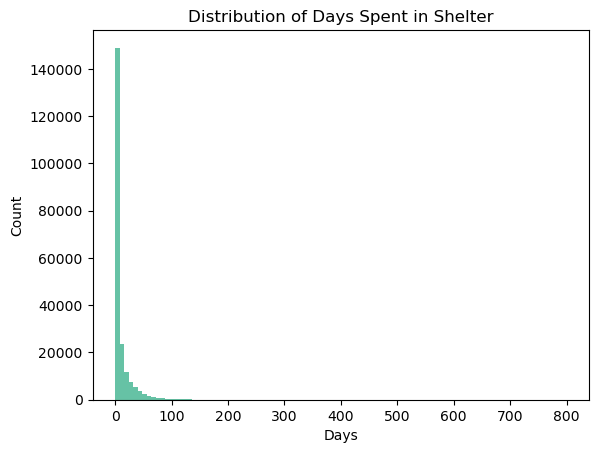

In [65]:
# Plot histogram of duration to examine spread
plt.hist(df['Duration (Days)'], bins=100)
plt.title('Distribution of Days Spent in Shelter')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### Histogram is still difficult to read due to large spread, let's look at a zoomed in one

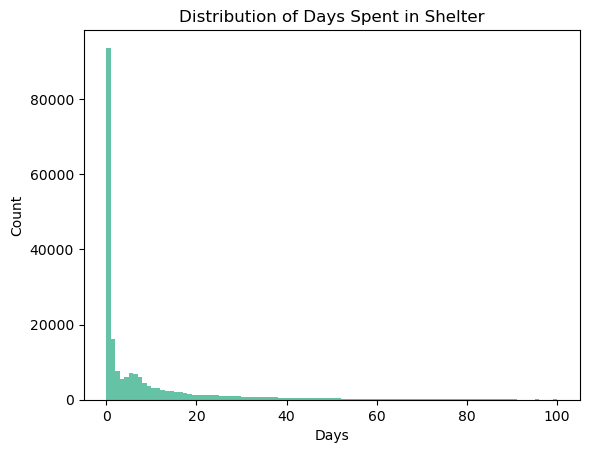

In [66]:
# Plot histogram of duration to examine spread with tail cut off
temp_df = df[~(df['Duration (Days)']>100)]
plt.hist(temp_df['Duration (Days)'], bins=100)
plt.title('Distribution of Days Spent in Shelter')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### The data has a strong left skew, with 0 being overwhelmingly the most common duration. There is another peak around 5 days, and the majority of data lies at less than ~ 10 days.

### It could make sense that 0 is the most common duration, considering that any animal that arrives deceased cannot have a duration of longer than 0. Let's examine if the skew is still as strong when counting only animals who are live, and also are cats and dogs because many 'other' animals are wildlife who may be euthanized.

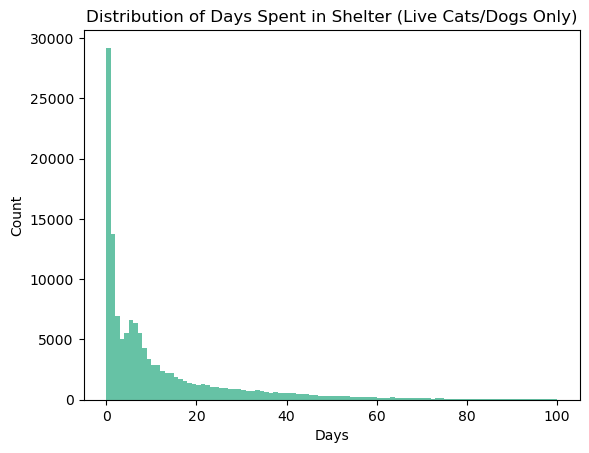

In [67]:
# Plot histogram of duration to examine spread of live cats and dogs

live_df = temp_df[(temp_df['Intake Group']!='DECEASED') & (temp_df['Animal Type']!='OTHER')].copy()
plt.hist(live_df['Duration (Days)'], bins=100)
plt.title('Distribution of Days Spent in Shelter (Live Cats/Dogs Only)')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

### The skew is slightly less strong, but still an extremely large majority of durations of zero. This makes me question the accuracy of the intake and outcome dates, as I would expect most animals to be in the shelter for more than one day.